# 1. IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
loan = pd.read_csv('loan.csv')
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_row', None)

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_row', None)

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = loan[loan['application_type']=='INDIVIDUAL'].copy()
df.reset_index(inplace = True, drop=True) 

In [6]:
# reduce feature based on constraint of the research
df.drop(['id', 'member_id','loan_amnt','funded_amnt_inv','grade','emp_title','url','desc','zip_code','out_prncp_inv','total_pymnt_inv','title','policy_code','application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint'],axis=1, inplace=True)

In [7]:
df.head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000.0,36 months,10.65,162.87,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,5861.071414,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,60 months,15.27,59.83,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,36 months,15.96,84.33,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,3003.653644,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,36 months,13.49,339.31,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,12226.302212,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,60 months,12.69,67.79,B5,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,3242.170000,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. EDA

In [8]:
dfDesc=[]
for i in df.columns:
    dfDesc.append([i,len(df[i]),
                     df[i].dtypes,
                     df[i].isna().sum(),
                     round((((df[i].isna().sum())/(len(df)))*100),2),
                     df[i].nunique(),
                     df[i].drop_duplicates().sample(2, replace=True).values])
pd.DataFrame(dfDesc, columns=['dataFeatures', 'dataLength','dataType', 'null', 'nullPct', 'unique','uniqueSample'])

,dataFeatures,dataLength,dataType,null,nullPct,unique,uniqueSample
0,funded_amnt,886868,float64,0,0.00,1372,"[34800.0, 7225.0]"
1,term,886868,object,0,0.00,2,"[ 36 months, 60 months]"
2,int_rate,886868,float64,0,0.00,542,"[21.64, 13.53]"
3,installment,886868,float64,0,0.00,68701,"[424.95, 240.19]"
4,sub_grade,886868,object,0,0.00,35,"[B5, B3]"
5,emp_length,886868,object,44764,5.05,11,"[2 years, 4 years]"
6,home_ownership,886868,object,0,0.00,6,"[OTHER, OWN]"
7,annual_inc,886868,float64,4,0.00,49345,"[64848.0, 99598.56]"
8,verification_status,886868,object,0,0.00,3,"[Verified, Verified]"
9,issue_d,886868,object,0,0.00,103,"[Jul-2012, Feb-2014]"


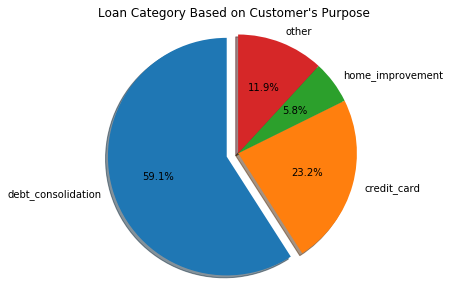

In [9]:
pielabel = ['debt_consolidation', 'credit_card', 'home_improvement', 'other']
sizes = []
for i in pielabel:
    if i != 'other':
        sizes.append (round((df['purpose'].value_counts()[i]/len(df))*100, 2))
    else :
        sizes.append (round(((len(df)-(df['purpose'].value_counts()[['debt_consolidation', 'credit_card', 'home_improvement']].sum()))/(len(df)))*100,2))
explode = (0.1,0,0,0)
#print(sizes)
        
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=pielabel,autopct='%1.1f%%',explode=explode,
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title("Loan Category Based on Customer's Purpose")
plt.show()

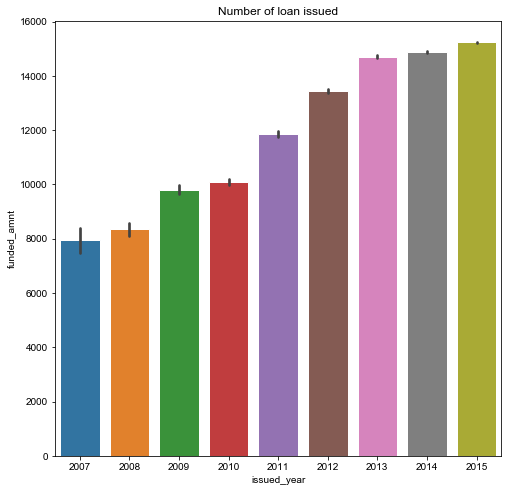

In [10]:
df['issued_year'] = pd.to_datetime(df['issue_d']).dt.year

plt.figure(figsize=(8,8))
plt.title('Number of loan issued')
sns.set_style('whitegrid')
sns.barplot(x = 'issued_year', y='funded_amnt', data=df)
plt.show()

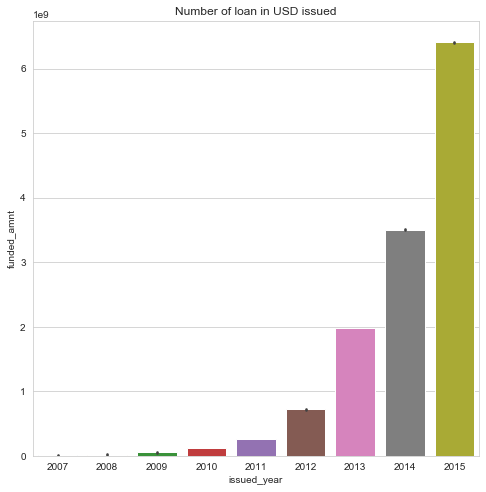

In [11]:
plt.figure(figsize=(8,8))
plt.title('Number of loan in USD issued')
sns.set_style('whitegrid')
sns.barplot(x = 'issued_year', y='funded_amnt', data=df, estimator=np.sum)
plt.show()

In [12]:
funded_state = pd.DataFrame()
funded_state['state']=df.groupby(df['addr_state']).sum()['funded_amnt'].index  
funded_state['funded_thousandUSD'] = ((df.groupby(df['addr_state']).sum()['funded_amnt'].values)/1000).astype('int64')
funded_state['funded_issued'] = ((df.groupby(df['addr_state']).count()['funded_amnt'].values)).astype('int64')
funded_state.sort_values(by=('funded_issued'),ascending=False).head(5)

,state,funded_thousandUSD,funded_issued
4,CA,1894661,129452
34,NY,1075338,74062
43,TX,1107168,71091
9,FL,847195,60889
14,IL,538092,35447


In [13]:
import folium as folium
state_geo = f'C:/Data/us-states.json'
USD = folium.Map(location=[30, -95], zoom_start=3.50)
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=funded_state,
    columns=['state', 'funded_thousandUSD'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Funded Amount'
).add_to(USD)
folium.LayerControl().add_to(USD)
USD

In [14]:
FI = folium.Map(location=[30, -95], zoom_start=3.50)
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=funded_state,
    columns=['state', 'funded_issued'],
    key_on='feature.id',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Funded Issued'
).add_to(FI)
folium.LayerControl().add_to(FI)
FI

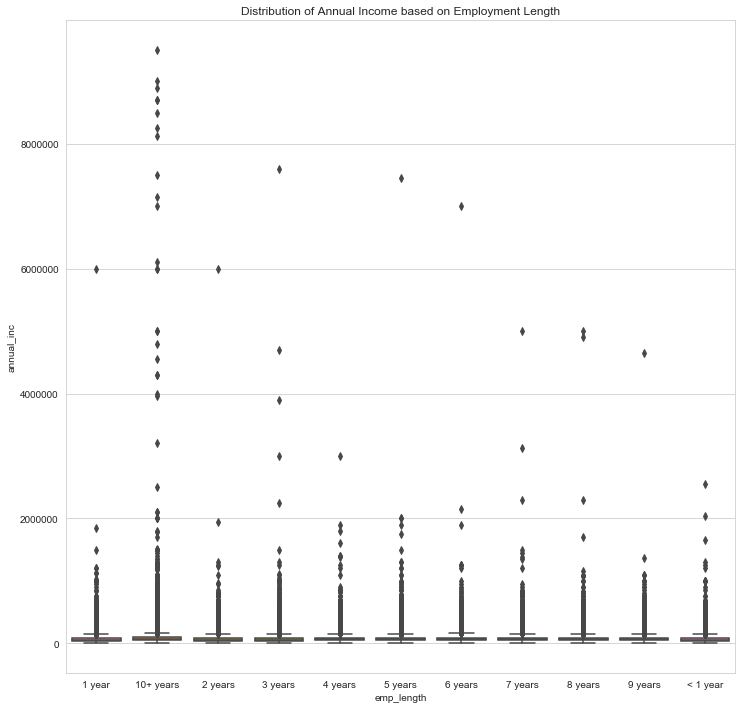

In [15]:
plt.figure(figsize=(12,12))
sns.boxplot(x='emp_length', y='annual_inc', data=df[['annual_inc','emp_length']].sort_values(by='emp_length'))
plt.title('Distribution of Annual Income based on Employment Length')
plt.show()

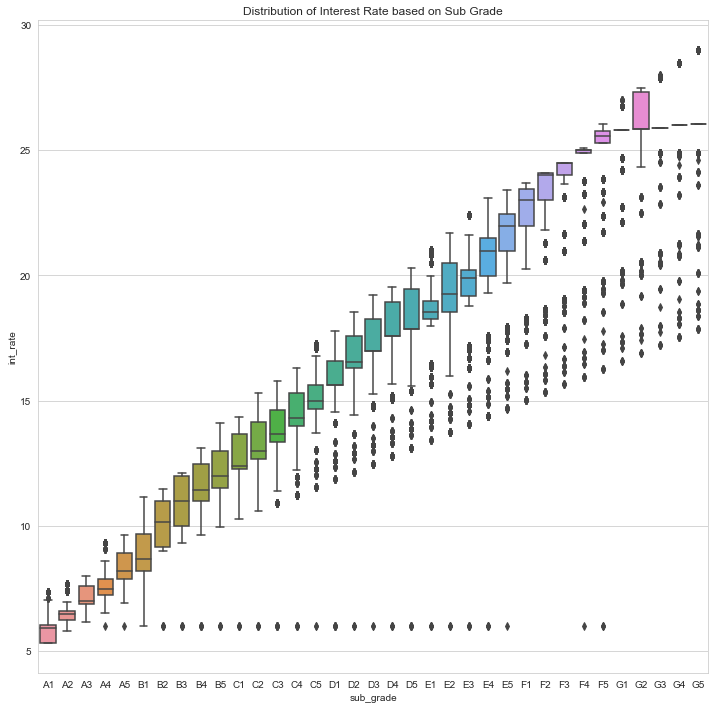

In [16]:
plt.figure(figsize=(12,12))
sns.boxplot(x='sub_grade', y='int_rate', data=df[['sub_grade','int_rate']].sort_values(by='sub_grade'))
plt.title('Distribution of Interest Rate based on Sub Grade')
plt.show()

In [17]:
badloan =['Charged Off', 'Late (31-120 days)', 'Default']
goodload = ['Current', 'Fully Paid', 'In Grace Period', 'Issued', 'Late (16-30 days)']
def label(cols):
    if (cols['loan_status'] in badloan):
        return (1)
    else:
        return (0)
df['flag_bad_loan'] =df[['loan_status']].apply(label, axis=1)

# 3. HANDLING MISSING VALUES

In [18]:
df.head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan
0,5000.0,36 months,10.65,162.87,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,5861.071414,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
1,2500.0,60 months,15.27,59.83,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,1
2,2400.0,36 months,15.96,84.33,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,3003.653644,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
3,10000.0,36 months,13.49,339.31,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,12226.302212,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
4,3000.0,60 months,12.69,67.79,B5,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,3242.170000,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0


#### CORR PEARSON (NUM VS NUM)

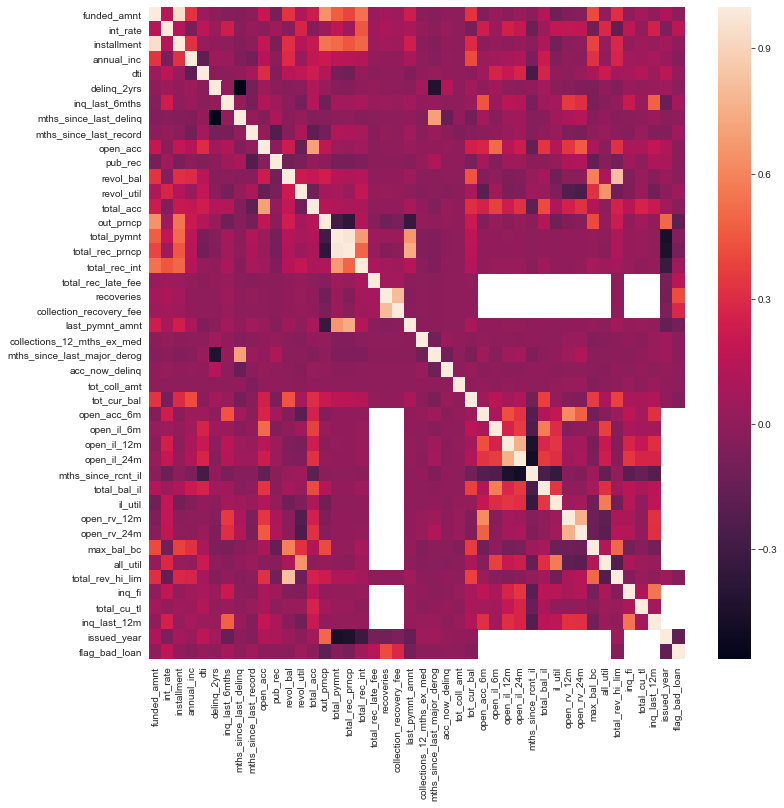

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr('pearson'))

In [20]:
df.corr('pearson')

,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan
funded_amnt,1.000000,0.144964,0.946010,0.332584,0.044439,0.000110,-0.034712,-0.038098,-0.010799,0.199442,-0.080900,0.333484,0.119945,0.222593,0.648568,0.473856,0.389731,0.533361,0.031125,0.072754,0.052002,0.228975,-0.016503,-0.037431,0.004065,-0.004279,0.328778,-0.040449,0.027746,-0.013445,0.024659,-0.011218,0.134942,-0.107954,-0.050484,-0.026724,0.413732,0.017857,0.312550,0.009949,0.070703,0.007371,0.108425,-0.000116
int_rate,0.144964,1.000000,0.132906,-0.072693,0.163633,0.055182,0.227719,-0.030021,0.022453,-0.010403,0.052151,-0.035690,0.269161,-0.038620,0.042242,0.170825,0.055217,0.446055,0.057189,0.106904,0.070910,0.101306,0.013353,-0.011239,0.026508,0.001133,-0.091439,0.227662,0.044243,0.246356,0.199460,-0.128818,0.052564,0.183670,0.178272,0.172693,-0.105363,0.286534,-0.166098,0.171692,0.019560,0.252940,-0.063861,0.167340
installment,0.946010,0.132906,1.000000,0.326297,0.029755,0.007852,-0.003630,-0.041393,-0.018588,0.183893,-0.070010,0.316631,0.131730,0.200413,0.547872,0.515481,0.449900,0.499089,0.041857,0.074604,0.054354,0.238623,-0.014128,-0.039251,0.006586,-0.003531,0.297888,-0.018570,0.015831,0.000352,0.021401,-0.011382,0.115814,-0.103570,-0.022166,-0.003226,0.387231,0.024063,0.286918,0.015399,0.055727,0.028997,0.074995,0.010386
annual_inc,0.332584,-0.072693,0.326297,1.000000,-0.177240,0.047479,0.035167,-0.050372,-0.096178,0.138391,-0.008319,0.295782,0.036775,0.187350,0.211450,0.160799,0.149916,0.128459,0.013490,0.007701,0.006620,0.090920,-0.003925,-0.037418,0.014779,0.001095,0.418378,0.043660,0.063301,0.087885,0.119835,-0.076101,0.215791,-0.049753,-0.006690,-0.011779,0.324936,0.011420,0.268848,0.064412,0.052497,0.080362,0.036036,-0.036528
dti,0.044439,0.163633,0.029755,-0.177240,1.000000,-0.008295,-0.017330,0.006127,0.066244,0.300938,-0.046612,0.140347,0.179612,0.225958,0.121120,-0.082738,-0.104829,0.020140,-0.011555,0.002823,0.004760,-0.059455,-0.000239,0.029310,0.006873,-0.004373,-0.013312,0.047968,0.264383,0.201544,0.269439,-0.278854,0.265930,0.009821,-0.006215,0.029573,0.098675,0.216953,0.071934,0.083783,0.126914,0.042240,0.159879,0.018732
delinq_2yrs,0.000110,0.055182,0.007852,0.047479,-0.008295,1.000000,0.021427,-0.562622,-0.088301,0.051185,-0.010986,-0.032480,-0.017230,0.122712,0.031591,-0.031888,-0.038384,0.001690,0.017442,-0.000726,0.000992,-0.019510,0.063067,-0.424554,0.130368,0.000205,0.064753,0.001902,0.053429,-0.003489,-0.019796,0.005328,0.061669,-0.011337,-0.025606,-0.054037,-0.064203,0.003718,-0.041066,0.040855,0.014196,0.034426,0.061530,-0.003720
inq_last_6mths,-0.034712,0.227719,-0.003630,0.035167,-0.017330,0.021427,1.000000,0.014697,-0.086432,0.111225,0.056869,-0.017538,-0.087713,0.135613,-0.106791,0.077676,0.062373,0.085581,0.031642,0.045593,0.034010,0.059996,0.006853,0.020542,-0.005323,0.003173,0.034366,0.438945,0.039618,0.149913,0.127369,-0.078973,0.052705,0.075767,0.357508,0.313366,-0.069810,-0.036255,0.005911,0.207479,0.032233,0.485502,-0.138774,0.069005
mths_since_last_delinq,-0.038098,-0.030021,-0.041393,-0.050372,0.006127,-0.562622,0.014697,1.000000,0.019157,-0.043197,0.096679,-0.026786,0.012661,-0.044944,-0.036590,-0.007532,0.000610,-0.028258,-0.021330,-0.004532,-0.005186,0.007271,-0.035838,0.699354,-0.139146,0.006465,-0.093900,0.062599,-0.029433,0.046107,0.056136,-0.026339,-0.029850,0.056045,0.088180,0.121695,-0.028662,0.007578,-0.028713,-0.009059,-0.001791,0.035246,-0.010405,-0.002920
mths_since_last_record

#### CORR SPEARMAN (NUM VS NUM)

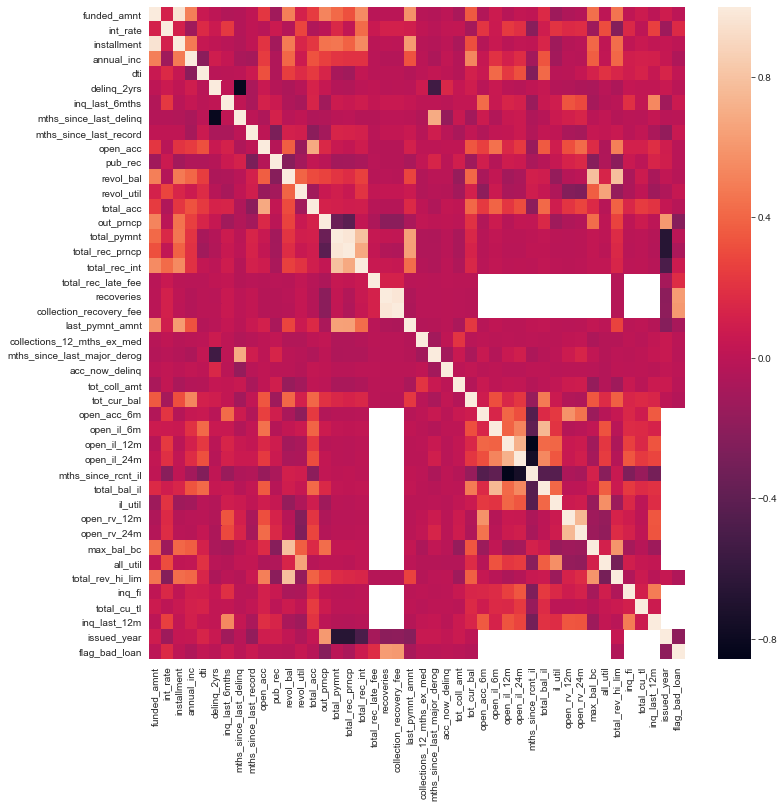

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr('spearman'))

In [22]:
df.corr('spearman')

,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan
funded_amnt,1.000000,0.116953,0.961288,0.504407,0.056690,0.008965,-0.041888,-0.037034,0.017094,0.216780,-0.111309,0.499848,0.121873,0.238233,0.527312,0.419369,0.323938,0.550078,-0.013516,-0.002459,-0.004027,0.580635,-0.017800,-0.031109,0.004105,-0.078342,0.354144,-0.042023,0.074661,-0.016820,0.030206,0.020195,0.158805,-0.124971,-0.052328,-0.030955,0.436976,0.006774,0.462137,0.013270,0.077173,0.004742,0.080412,0.000034
int_rate,0.116953,1.000000,0.112223,-0.122704,0.164750,0.065353,0.229447,-0.031077,0.018514,-0.014516,0.068294,-0.031964,0.277247,-0.051085,-0.004085,0.151994,0.023807,0.421037,0.056729,0.110032,0.108777,0.098835,0.014577,-0.011456,0.027269,0.031416,-0.093780,0.214132,0.069928,0.235649,0.187225,-0.218519,0.086130,0.203481,0.164960,0.173013,-0.131456,0.309419,-0.235445,0.152245,0.012886,0.255046,-0.125479,0.162150
installment,0.961288,0.112223,1.000000,0.484345,0.048601,0.015853,-0.015530,-0.040210,0.014052,0.204527,-0.103570,0.480507,0.138010,0.216730,0.453683,0.464726,0.387431,0.544688,-0.007211,0.005947,0.004908,0.620682,-0.016094,-0.033618,0.005754,-0.072178,0.316619,-0.025845,0.061237,-0.006977,0.025347,0.013490,0.141161,-0.117739,-0.029852,-0.010732,0.411438,0.014443,0.427539,0.014257,0.063375,0.022216,0.041456,0.011191
annual_inc,0.504407,-0.122704,0.484345,1.000000,-0.210136,0.088059,0.039474,-0.080536,-0.091043,0.243822,-0.051379,0.411278,0.073530,0.329239,0.254087,0.216117,0.195081,0.200853,-0.008767,-0.035989,-0.035563,0.327683,-0.004986,-0.060349,0.022294,-0.036356,0.533083,0.046159,0.197353,0.110185,0.173283,-0.106775,0.333130,-0.106183,-0.011711,-0.016586,0.371800,0.021293,0.408815,0.099653,0.112835,0.104144,0.046644,-0.059041
dti,0.056690,0.164750,0.048601,-0.210136,1.000000,-0.010026,-0.007453,0.003144,0.067203,0.322482,-0.050438,0.247797,0.168324,0.236689,0.130653,-0.082912,-0.114527,0.029400,-0.012508,-0.008294,-0.007495,-0.036986,-0.000837,0.029327,0.006748,-0.024493,0.109419,0.060399,0.415744,0.224629,0.321042,-0.244870,0.413918,-0.013796,-0.001998,0.035191,0.119708,0.199006,0.142984,0.091221,0.127586,0.044449,0.129594,0.022069
delinq_2yrs,0.008965,0.065353,0.015853,0.088059,-0.010026,1.000000,0.015655,-0.819952,-0.069335,0.058720,-0.027650,-0.059675,-0.021424,0.128222,0.046517,-0.030916,-0.039009,0.004379,0.018624,-0.010313,-0.008650,-0.012551,0.074830,-0.538724,0.143841,0.036373,0.086760,-0.011543,0.063470,-0.007674,-0.020869,0.014883,0.049124,-0.036933,-0.040610,-0.059915,-0.073944,-0.013775,-0.061481,0.037665,0.026733,0.024278,0.056842,-0.004770
inq_last_6mths,-0.041888,0.229447,-0.015530,0.039474,-0.007453,0.015655,1.000000,0.020121,-0.073284,0.115378,0.070015,-0.053762,-0.084940,0.130788,-0.116520,0.072957,0.056043,0.080326,0.029420,0.060528,0.058585,0.037557,0.006389,0.011934,-0.006813,0.029508,0.029701,0.423143,0.049833,0.133970,0.108825,-0.142211,0.056363,0.088824,0.335722,0.292918,-0.095585,-0.028758,-0.007352,0.188473,0.028909,0.540379,-0.114517,0.069997
mths_since_last_delinq,-0.037034,-0.031077,-0.040210,-0.080536,0.003144,-0.819952,0.020121,1.000000,0.002873,-0.053009,0.117428,-0.012801,0.018032,-0.050592,-0.038625,-0.005922,0.001230,-0.027623,-0.023875,0.000588,-0.000940,-0.007349,-0.042025,0.693249,-0.166413,0.051257,-0.108423,0.076799,-0.042933,0.055337,0.067182,-0.053168,-0.018179,0.066909,0.103700,0.132137,-0.001657,0.025486,-0.027814,-0.007011,-0.009377,0.040523,-0.013868,-0.003727
mths_since_

#### CORRELATION RATIO ( NUMERICAL VS CATEGORICAL)

In [23]:
categorical_columns = df.select_dtypes('object').columns
numerical_columns = df.select_dtypes('number').columns

In [24]:
categorical_columns

Index(['term', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [25]:
numerical_columns

Index(['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'issued_year', 'flag_bad_loan'],
      dtype='object')

In [26]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(
        np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),
                                      2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)
    return eta


In [27]:
corr_ratio = []
for i in categorical_columns:
    corrtemp = []
    for j in numerical_columns:
        corrtemp.append(correlation_ratio(df[i], df[j]))
    corr_ratio.append(corrtemp)
Corr_ratio= pd.DataFrame(data=corr_ratio, index = categorical_columns, columns=numerical_columns)

In [28]:
Corr_ratio

,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan
term,0.410659,0.427969,0.144892,NaN,0.107258,NaN,NaN,NaN,NaN,NaN,NaN,0.091127,NaN,NaN,0.393721,0.083390,0.025600,0.382953,0.004787,0.057346,0.035920,0.071569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080847,0.038008
sub_grade,0.180232,0.979671,0.165817,NaN,0.189924,NaN,NaN,NaN,NaN,NaN,NaN,0.046889,NaN,NaN,0.137528,0.114766,0.065181,0.395641,0.058092,0.102662,0.071780,0.076227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070521,0.142524
emp_length,0.108053,0.016773,0.091668,NaN,0.043431,NaN,NaN,NaN,NaN,NaN,NaN,0.095035,NaN,NaN,0.087232,0.058331,0.047094,0.072570,0.009940,0.010042,0.004465,0.031514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068643,0.022743
home_ownership,0.196996,0.064520,0.163978,NaN,0.032754,NaN,NaN,NaN,NaN,NaN,NaN,0.163954,NaN,NaN,0.122570,0.111640,0.100846,0.099590,0.009330,0.007813,0.007309,0.071228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068143,0.037716
verification_status,0.290207,0.251742,0.279639,NaN,0.096010,NaN,NaN,NaN,NaN,NaN,NaN,0.091057,NaN,NaN,0.182405,0.222995,0.177373,0.274436,0.020439,0.054425,0.034394,0.105692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154322,0.049428
issue_d,0.127405,0.196200,0.121270,NaN,0.173927,NaN,NaN,NaN,NaN,NaN,NaN,0.057199,NaN,NaN,0.568753,0.607485,0.565710,0.478545,0.095998,0.125553,0.083130,0.239032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.206793
loan_status,0.105107,0.179823,0.065973,NaN,0.137564,NaN,NaN,NaN,NaN,NaN,NaN,0.056904,NaN,NaN,0.630858,0.542091,0.631246,0.116345,0.174915,0.479804,0.330896,0.646640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.628091,1.000000
pymnt_plan,0.002964,0.003070,0.003255,NaN,0.000120,NaN,NaN,NaN,NaN,NaN,NaN,0.000445,NaN,NaN,0.000846,0.004756,0.002982,0.008506,0.002138,0.000376,0.000260,0.000868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003782,0.004542
purpose,0.210030,0.223381,0.197819,NaN,0.146060,NaN,NaN,NaN,NaN,NaN,NaN,0.100339,NaN,NaN,0.152264,0.109419,0.095593,0.115107,0.034542,0.035934,0.026259,0.057536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183446,0.056863
addr_state,0.063008,0.039707,0.064981,NaN,0.133898,NaN,NaN,NaN,NaN,NaN,NaN,0.055665,NaN,NaN,0.067923,0.072452,0.073395,0.053189,0.020566,0.018585,0.016892,0.045620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083809,0.031694


#### CRAMERS V ( CATEGORICAL VS CATEGORICAL)

In [29]:
def cramers_v(x, y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [30]:
import scipy.stats as ss
cramers = []
for i in categorical_columns:
    cramerstemp = []
    for j in categorical_columns:
        cramerstemp.append(cramers_v(df[i], df[j]))
    cramers.append(cramerstemp)
CramersV= pd.DataFrame(data=cramers, columns = categorical_columns, index=categorical_columns)

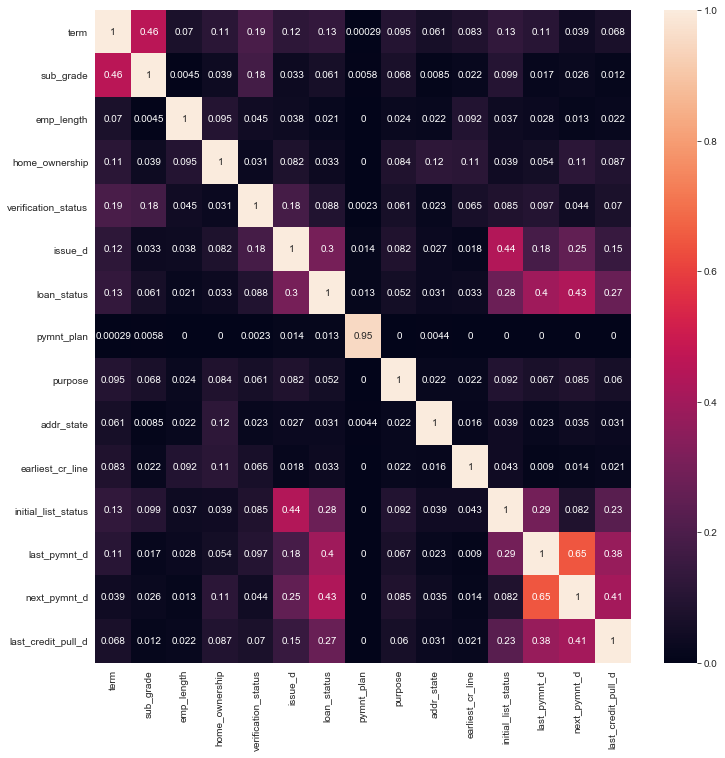

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(CramersV, annot=True)

#### HANDLING MISSING VALUE

In [32]:
# 5. emp_length
import math

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['issue_d'] = pd.to_datetime(df['issue_d'])

for i in range (len(df['emp_length'])):
    if (str(df['emp_length'][i]) == 'nan'):
        x= math.floor(((df['issue_d'][i] - df['earliest_cr_line'][i]).days)/365)
        if 1 < x < 10:
            df['emp_length'][i] = '{} years'.format(str(x))
        elif x == 1:
            df['emp_length'][i] = '1 year'       
        elif x < 1:
            df['emp_length'][i] = '< 1 year'
        elif x >= 10:
            df['emp_length'][i] = '10+ years'

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [33]:
df[df['annual_inc'].isnull()]

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan
42449,5000.0,36 months,7.43,155.38,A2,< 1 year,NONE,NaN,Not Verified,2007-08-01,Does not meet the credit policy. Status:Fully ...,n,other,NY,1.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,5593.46,5000.0,593.46,0.0,0.0,0.0,Aug-2010,157.31,Sep-2010,May-2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,0
42450,7000.0,36 months,7.75,218.55,A3,< 1 year,NONE,NaN,Not Verified,2007-08-01,Does not meet the credit policy. Status:Fully ...,n,other,NY,1.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,7867.53,7000.0,867.53,0.0,0.0,0.0,Aug-2010,220.03,Sep-2010,May-2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,0
42480,6700.0,36 months,7.75,209.18,A3,< 1 year,NONE,NaN,Not Verified,2007-07-01,Does not meet the credit policy. Status:Fully ...,n,other,NY,1.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,7530.42,6700.0,830.42,0.0,0.0,0.0,Jul-2010,209.89,Aug-2010,May-2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,0
42533,6500.0,36 months,8.38,204.84,A5,< 1 year,NONE,NaN,Not Verified,2007-06-01,Does not meet the credit policy. Status:Fully ...,n,other,NY,4.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,7373.83,6500.0,873.83,0.0,0.0,0.0,Jun-2010,205.32,Jul-2010,Aug-2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,0


In [34]:
# annual_inc
for i in range (len(df['annual_inc'])):
    if (str(df['annual_inc'][i]) == 'nan'):
        df['annual_inc'][i] = float(0.0)


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [35]:
df[df['annual_inc'].isnull()]

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan


In [36]:
df[df['delinq_2yrs'].isnull()]['loan_status'].value_counts()

Does not meet the credit policy. Status:Fully Paid     26
Does not meet the credit policy. Status:Charged Off     3
Name: loan_status, dtype: int64

In [37]:
df['loan_status'].value_counts()

Current                                                601338
Fully Paid                                             207722
Charged Off                                             45248
Late (31-120 days)                                      11589
Issued                                                   8396
In Grace Period                                          6250
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [38]:
# delinq_2yrs
df.dropna(subset=['delinq_2yrs'], inplace=True)

In [39]:
df[df['mths_since_last_delinq'].isnull()].head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan
0,5000.0,36 months,10.65,162.87,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.00,5861.071414,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
1,2500.0,60 months,15.27,59.83,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.00,1008.710000,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,1
2,2400.0,36 months,15.96,84.33,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.00,3003.653644,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
5,5000.0,36 months,7.90,156.46,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,wedding,AZ,11.20,0.0,2004-11-01,3.0,NaN,NaN,9.0,0.0,7963.0,28.3,12.0,f,0.00,5631.377753,5000.00,631.38,0.0,0.00,0.00,Jan-2015,161.03,NaN,Sep-2015,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
6,7000.0,60 months,15.96,170.08,C5,8 years,RENT,47004.0,Not Verified,2011-12-01,Current,n,debt_consolidation,NC,23.51,0.0,2005-07-01,1.0,NaN,NaN,7.0,0.0,17726.0,85.6,11.0,f,1889.15,8136.840000,5110.85,3025.99,0.0,0.00,0.00,Jan-2016,170.08,Feb-2016,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0


In [40]:
primary_mean_msld = df.groupby('delinq_2yrs').mean()['mths_since_last_delinq']
def fill_average_msld(cols):
    if pd.isna(cols['mths_since_last_delinq']):
        return (round(primary_mean_msld[cols['delinq_2yrs']]))
    else:
        return (cols['mths_since_last_delinq'])

In [41]:
# mths_since_last_delinq
df['mths_since_last_delinq'] = df[['mths_since_last_delinq','delinq_2yrs']].apply(fill_average_msld, axis=1)

In [42]:
df.head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan
0,5000.0,36 months,10.65,162.87,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0.0,1985-01-01,1.0,48.0,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,5861.071414,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
1,2500.0,60 months,15.27,59.83,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0.0,1999-04-01,5.0,48.0,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,1
2,2400.0,36 months,15.96,84.33,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0.0,2001-11-01,2.0,48.0,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,3003.653644,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
3,10000.0,36 months,13.49,339.31,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,0.0,1996-02-01,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,12226.302212,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
4,3000.0,60 months,12.69,67.79,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,OR,17.94,0.0,1996-01-01,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,3242.170000,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0


In [43]:
df[df['mths_since_last_record'].isnull()].head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan
0,5000.0,36 months,10.65,162.87,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0.0,1985-01-01,1.0,48.0,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,5861.071414,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
1,2500.0,60 months,15.27,59.83,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0.0,1999-04-01,5.0,48.0,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,1
2,2400.0,36 months,15.96,84.33,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0.0,2001-11-01,2.0,48.0,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,3003.653644,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
3,10000.0,36 months,13.49,339.31,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,0.0,1996-02-01,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,12226.302212,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
4,3000.0,60 months,12.69,67.79,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,OR,17.94,0.0,1996-01-01,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,3242.170000,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0


In [44]:
# mths_since_last_record
df['mths_since_last_record'] = df['mths_since_last_record'].fillna(0)

In [45]:
df[df['mths_since_last_record'].isnull()].head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan


In [46]:
dfDesc=[]
for i in df.columns:
    dfDesc.append([i,
                     df[i].dtypes,
                     df[i].isna().sum(),
                     round((((df[i].isna().sum())/(len(df)))*100),2),
                     df[i].nunique(),
                     df[i].drop_duplicates().sample(2, replace=True).values])
pd.DataFrame(dfDesc, columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,funded_amnt,float64,0,0.00,1372,"[30675.0, 33650.0]"
1,term,object,0,0.00,2,"[ 60 months, 36 months]"
2,int_rate,float64,0,0.00,542,"[13.92, 17.88]"
3,installment,float64,0,0.00,68694,"[143.38, 518.26]"
4,sub_grade,object,0,0.00,35,"[D5, D4]"
5,emp_length,object,0,0.00,11,"[9 years, 1 year]"
6,home_ownership,object,0,0.00,6,"[NONE, ANY]"
7,annual_inc,float64,0,0.00,49345,"[35243.0, 9732.0]"
8,verification_status,object,0,0.00,3,"[Source Verified, Not Verified]"
9,issue_d,datetime64[ns],0,0.00,103,"[2014-11-01T00:00:00.000000000, 2011-01-01T00:..."


In [47]:
df['revol_util'].groupby(df['sub_grade']).mean()

sub_grade
A1    31.512403
A2    37.855136
A3    41.146018
A4    44.765752
A5    47.579443
B1    49.593589
B2    52.207010
B3    53.634783
B4    55.049905
B5    56.235738
C1    57.058052
C2    58.099541
C3    58.296146
C4    59.403194
C5    59.451475
D1    60.336717
D2    60.757014
D3    60.527325
D4    61.605623
D5    61.716279
E1    61.500116
E2    61.951486
E3    62.196206
E4    62.398248
E5    62.956182
F1    63.040746
F2    62.524828
F3    63.165559
F4    62.950538
F5    63.189073
G1    62.245869
G2    63.024138
G3    63.344025
G4    62.374545
G5    62.868531
Name: revol_util, dtype: float64

In [48]:
df[df['revol_util'].isnull()].head(3)

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan
3577,8000.0,36 months,19.42,294.95,E3,3 years,RENT,30000.0,Source Verified,2011-11-01,Fully Paid,n,debt_consolidation,IL,18.56,0.0,1992-09-01,1.0,48.0,0.0,6.0,0.0,0.0,NaN,10.0,f,0.0,10704.051021,8000.00,2689.06,14.99557,0.00,0.00,Dec-2014,76.83,NaN,Dec-2015,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
4730,6100.0,36 months,14.27,209.29,C2,9 years,MORTGAGE,23748.0,Verified,2011-11-01,Charged Off,n,home_improvement,MO,23.95,0.0,2002-05-01,0.0,48.0,0.0,2.0,0.0,0.0,NaN,4.0,f,0.0,1755.220000,989.91,471.90,0.00000,293.41,2.82,Jun-2012,209.29,NaN,Nov-2012,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,1
4960,7200.0,36 months,14.27,247.03,C2,7 years,RENT,48000.0,Not Verified,2011-10-01,Fully Paid,n,debt_consolidation,CA,15.28,0.0,1997-03-01,0.0,48.0,0.0,2.0,0.0,0.0,NaN,25.0,f,0.0,7306.070000,7200.00,106.07,0.00000,0.00,0.00,Apr-2012,66.27,NaN,Mar-2014,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0


In [49]:
primary_mean_revutil = df.groupby('sub_grade').mean()['revol_util']
def fill_average_revutil(cols):
    if pd.isna(cols['revol_util']):
        return (round(primary_mean_revutil[cols['sub_grade']]))
    else:
        return (cols['revol_util'])

In [50]:
# revol_util
df['revol_util'] = df[['revol_util', 'sub_grade']].apply(fill_average_revutil, axis=1)

In [51]:
df[df['revol_util'].isnull()].head(3)

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan


In [52]:
df[['issue_d','earliest_cr_line','last_pymnt_d','loan_status','term','last_pymnt_amnt']][df['last_pymnt_d'].isnull()].head()

,issue_d,earliest_cr_line,last_pymnt_d,loan_status,term,last_pymnt_amnt
26,2011-12-01,2003-10-01,NaN,Charged Off,36 months,0.0
2731,2011-11-01,1997-11-01,NaN,Charged Off,36 months,0.0
3625,2011-11-01,2006-06-01,NaN,Charged Off,60 months,0.0
3998,2011-11-01,2008-08-01,NaN,Charged Off,60 months,0.0
4220,2011-11-01,1998-10-01,NaN,Charged Off,36 months,0.0


In [53]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'])
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])

In [54]:
# last_pymnt_d
def fill_lpd(cols):
    if pd.isna(cols['last_pymnt_d']):
        return (cols['issue_d'])
    else:
        return (cols['last_pymnt_d'])
df['last_pymnt_d'] = df[['last_pymnt_d', 'issue_d']].apply(fill_lpd, axis=1)

In [55]:
df.loc[26]

funded_amnt                                  15000
term                                     36 months
int_rate                                     14.27
installment                                 514.64
sub_grade                                       C2
emp_length                                 9 years
home_ownership                                RENT
annual_inc                                   60000
verification_status                   Not Verified
issue_d                        2011-12-01 00:00:00
loan_status                            Charged Off
pymnt_plan                                       n
purpose                         debt_consolidation
addr_state                                      NY
dti                                          15.22
delinq_2yrs                                      0
earliest_cr_line               2003-10-01 00:00:00
inq_last_6mths                                   1
mths_since_last_delinq                          48
mths_since_last_record         

In [56]:
df[df['next_pymnt_d'].isnull()].head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan
0,5000.0,36 months,10.65,162.87,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0.0,1985-01-01,1.0,48.0,0.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,5861.071414,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
1,2500.0,60 months,15.27,59.83,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0.0,1999-04-01,5.0,48.0,0.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,1
2,2400.0,36 months,15.96,84.33,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0.0,2001-11-01,2.0,48.0,0.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,3003.653644,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
3,10000.0,36 months,13.49,339.31,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,0.0,1996-02-01,1.0,35.0,0.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,12226.302212,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0
5,5000.0,36 months,7.90,156.46,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,wedding,AZ,11.20,0.0,2004-11-01,3.0,48.0,0.0,9.0,0.0,7963.0,28.3,12.0,f,0.0,5631.377753,5000.00,631.38,0.00,0.00,0.00,2015-01-01,161.03,NaT,2015-09-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0


In [57]:
# next_pymnt_d
def fill_npd(cols):
    if pd.isna(cols['next_pymnt_d']):
        return (cols['last_pymnt_d'])
    else:
        return (cols['next_pymnt_d'])
df['next_pymnt_d'] = df[['last_pymnt_d', 'next_pymnt_d']].apply(fill_npd, axis=1)

In [58]:
df[df['next_pymnt_d'].isnull()].head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan


In [59]:
#additional features
df['pymnt_length_month'] = round(((df['last_pymnt_d']-df['issue_d']).dt.days)/30)

In [60]:
df.head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan,pymnt_length_month
0,5000.0,36 months,10.65,162.87,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0.0,1985-01-01,1.0,48.0,0.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,5861.071414,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2015-01-01,2016-01-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0,38.0
1,2500.0,60 months,15.27,59.83,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0.0,1999-04-01,5.0,48.0,0.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-04-01,2013-09-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,1,16.0
2,2400.0,36 months,15.96,84.33,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0.0,2001-11-01,2.0,48.0,0.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,3003.653644,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2014-06-01,2016-01-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0,30.0
3,10000.0,36 months,13.49,339.31,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,0.0,1996-02-01,1.0,35.0,0.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,12226.302212,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,2015-01-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0,38.0
4,3000.0,60 months,12.69,67.79,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,OR,17.94,0.0,1996-01-01,0.0,38.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,3242.170000,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0,50.0


In [61]:
dfDesc=[]
for i in df.columns:
    dfDesc.append([i,
                     df[i].dtypes,
                     df[i].isna().sum(),
                     round((((df[i].isna().sum())/(len(df)))*100),2),
                     df[i].nunique(),
                     df[i].drop_duplicates().sample(2, replace=True).values])
pd.DataFrame(dfDesc, columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,funded_amnt,float64,0,0.00,1372,"[8725.0, 19000.0]"
1,term,object,0,0.00,2,"[ 36 months, 36 months]"
2,int_rate,float64,0,0.00,542,"[16.77, 13.53]"
3,installment,float64,0,0.00,68694,"[570.54, 94.73]"
4,sub_grade,object,0,0.00,35,"[B5, F2]"
5,emp_length,object,0,0.00,11,"[1 year, 3 years]"
6,home_ownership,object,0,0.00,6,"[MORTGAGE, OTHER]"
7,annual_inc,float64,0,0.00,49345,"[52406.0, 92012.0]"
8,verification_status,object,0,0.00,3,"[Not Verified, Not Verified]"
9,issue_d,datetime64[ns],0,0.00,103,"[2012-03-01T00:00:00.000000000, 2010-01-01T00:..."


In [62]:
df[df['last_credit_pull_d'].isnull()]

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan,pymnt_length_month
26094,5000.0,36 months,11.12,163.98,B3,5 years,RENT,96000.0,Not Verified,2010-09-01,Charged Off,n,small_business,CA,4.04,0.0,1997-10-01,0.0,48.0,0.0,4.0,0.0,7172.0,80.6,9.0,f,0.00,3362.960000,2553.55,702.45,0.0,106.96,1.3400,2012-06-01,163.98,2012-06-01,NaT,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,21.0
39545,1000.0,36 months,7.12,30.94,A1,< 1 year,MORTGAGE,120000.0,Not Verified,2007-12-01,Fully Paid,n,other,CA,0.65,0.0,1997-07-01,1.0,0.0,0.0,7.0,0.0,2227.0,3.8,37.0,f,0.00,1110.490000,1000.00,110.49,0.0,0.00,0.0000,2010-08-01,185.80,2010-08-01,NaT,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,0,32.0
42482,4200.0,36 months,12.49,140.48,D3,1 year,RENT,49500.0,Not Verified,2007-07-01,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,MD,7.68,0.0,2004-09-01,1.0,0.0,0.0,7.0,0.0,6670.0,72.5,9.0,f,0.00,4716.030000,4200.00,516.03,0.0,0.00,0.0000,2008-09-01,2890.99,2008-10-01,NaT,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,0,14.0
65583,16800.0,36 months,11.99,557.93,B3,10+ years,MORTGAGE,108000.0,Source Verified,2013-11-01,Fully Paid,n,credit_card,KS,23.04,1.0,1995-09-01,2.0,8.0,0.0,18.0,0.0,23244.0,62.5,39.0,f,0.00,19556.181844,16800.00,2756.18,0.0,0.00,0.0000,2015-09-01,7839.95,2015-09-01,NaT,0.0,30.0,0.0,0.0,260092.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37200.0,NaN,NaN,NaN,2013,0,22.0
67604,6800.0,36 months,23.40,264.65,E5,6 years,OWN,52000.0,Verified,2013-11-01,Fully Paid,n,debt_consolidation,NY,27.72,0.0,1994-05-01,0.0,48.0,0.0,16.0,0.0,33114.0,86.0,31.0,f,0.00,7895.915161,6800.00,1095.92,0.0,0.00,0.0000,2014-08-01,5779.62,2014-08-01,NaT,0.0,NaN,0.0,0.0,39707.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38500.0,NaN,NaN,NaN,2013,0,9.0
67775,30000.0,60 months,14.30,702.73,C1,< 1 year,RENT,180000.0,Verified,2013-11-01,Charged Off,n,car,CA,17.60,0.0,1997-11-01,0.0,54.0,0.0,11.0,0.0,7694.0,41.8,23.0,f,0.00,14901.270000,5631.43,4905.26,0.0,4364.58,785.6244,2015-02-01,702.73,2015-02-01,NaT,0.0,NaN,0.0,156.0,87551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18400.0,NaN,NaN,NaN,2013,1,15.0
68251,10000.0,36 months,7.62,311.62,A3,9 years,MORTGAGE,113000.0,Source Verified,2013-11-01,Fully Paid,n,debt_consolidation,NH,9.13,0.0,1998-05-01,3.0,46.0,0.0,9.0,0.0,38098.0,16.2,13.0,f,0.00,10728.770000,9999.99,728.78,0.0,0.00,0.0000,2015-09-01,228.77,2015-09-01,NaT,0.0,NaN,0.0,0.0,330929.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120700.0,NaN,NaN,NaN,2013,0,22.0
70447,9125.0,36 months,6.62,280.18,A2,2 years,RENT,80000.0,Not Verified,2013-11-01,Current,n,debt_consolidation,CA,12.57,0.0,2005-07-01,3.0,48.0,0.0,3.0,0.0,9142.0,90.5,19.0,w,2718.29,7284.680000,6406.71,877.97,0.0,0.00,0.0000,2016-01-01,280.18,2016-02-01,NaT,0.0,NaN,0.0,0.0,32835.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100.0,NaN,NaN,NaN,2013,0,26.0
70508,17825.0,36 months,17.76,642.28,D1,< 1 year,RENT,65000.0,Verified,2013-11-01,Current,n,debt_consolidation,WA,13.22,0.0,2002-11-01,1.0,32.0,0.0,10.0,0.0,14984.0,57.0,19.0,f,5248.55,17199.190000,12576.45,4622.74,0.0,0.00,0.0000,2016-01-01,642.28,2016-02-01,NaT,0.0,32.0,0.0,0.0,15830.0,NaN,NaN

In [63]:
# last_credit_pull_d
from datetime import date
from dateutil.relativedelta import relativedelta

def fill_lcp(cols):
    if (pd.isna(cols['last_credit_pull_d'])) & (cols['term'] == ' 36 months'):
        return (cols['issue_d']+ relativedelta(months=+36))
    elif (pd.isna(cols['last_credit_pull_d'])) & (cols['term'] == ' 60 months'):
        return (cols['issue_d']+ relativedelta(months=+60))
    else:
        return (cols['last_credit_pull_d'])
df['last_credit_pull_d'] = df[['last_credit_pull_d', 'issue_d', 'term']].apply(fill_lcp, axis=1)

In [64]:
df[df['collections_12_mths_ex_med'].isnull()].head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan,pymnt_length_month
39698,6000.0,36 months,10.59,195.27,C2,2 years,RENT,19000.0,Not Verified,2007-10-01,Fully Paid,n,educational,NY,8.15,0.0,1999-04-01,0.0,0.0,0.0,6.0,0.0,8528.0,86.1,7.0,f,0.0,7029.30,6000.0,1029.30,0.0,0.0,0.0,2010-10-01,198.80,2010-10-01,2010-09-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,0,37.0
39711,2000.0,36 months,7.12,61.87,A1,10+ years,MORTGAGE,118000.0,Not Verified,2007-09-01,Fully Paid,n,debt_consolidation,MA,0.43,0.0,1991-06-01,0.0,48.0,0.0,14.0,0.0,4709.0,18.5,8.0,f,0.0,2219.35,2000.0,219.35,0.0,0.0,0.0,2010-04-01,3.06,2010-04-01,2010-04-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,0,31.0
39719,5000.0,36 months,7.43,155.38,A2,10+ years,MORTGAGE,65000.0,Not Verified,2007-09-01,Fully Paid,n,other,MA,0.28,0.0,1994-12-01,1.0,48.0,0.0,12.0,0.0,1576.0,5.7,21.0,f,0.0,5200.44,5000.0,200.44,0.0,0.0,0.0,2008-04-01,4268.52,2008-04-01,2007-06-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,0,7.0
39728,4000.0,36 months,9.64,128.41,B4,< 1 year,NONE,100000.0,Not Verified,2007-08-01,Fully Paid,n,other,CA,15.00,0.0,1999-05-01,1.0,48.0,0.0,6.0,0.0,8155.0,14.9,8.0,f,0.0,4622.30,4000.0,622.30,0.0,0.0,0.0,2010-09-01,129.76,2010-09-01,2007-08-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,0,38.0
39729,2800.0,36 months,8.70,88.65,B1,< 1 year,NONE,120000.0,Not Verified,2007-08-01,Fully Paid,n,other,MA,15.00,0.0,1999-05-01,1.0,48.0,0.0,6.0,0.0,8155.0,14.9,8.0,f,0.0,3191.12,2800.0,391.12,0.0,0.0,0.0,2010-09-01,89.80,2010-09-01,2007-08-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,0,38.0


In [65]:
df['collections_12_mths_ex_med'].value_counts()

0.0     875048
1.0      10820
2.0        730
3.0         88
4.0         23
5.0          7
6.0          2
7.0          1
16.0         1
20.0         1
14.0         1
10.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [66]:
# collections_12_mths_ex_med
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

In [67]:
df['collections_12_mths_ex_med'].value_counts()

0.0     875164
1.0      10820
2.0        730
3.0         88
4.0         23
5.0          7
6.0          2
7.0          1
16.0         1
20.0         1
14.0         1
10.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [68]:
df[df['mths_since_last_major_derog'].isnull()].head(3)

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan,pymnt_length_month
0,5000.0,36 months,10.65,162.87,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0.0,1985-01-01,1.0,48.0,0.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,5861.071414,5000.00,861.07,0.0,0.00,0.00,2015-01-01,171.62,2015-01-01,2016-01-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0,38.0
1,2500.0,60 months,15.27,59.83,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0.0,1999-04-01,5.0,48.0,0.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,1008.710000,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,2013-04-01,2013-09-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,1,16.0
2,2400.0,36 months,15.96,84.33,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0.0,2001-11-01,2.0,48.0,0.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,3003.653644,2400.00,603.65,0.0,0.00,0.00,2014-06-01,649.91,2014-06-01,2016-01-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,0,30.0


In [69]:
# mths_since_last_major_derog
primary_mean_mslmd = df.groupby('mths_since_last_delinq').mean()['mths_since_last_major_derog']
def fill_average_mslmd(cols):
    if pd.isna(cols['mths_since_last_major_derog']):
        return (round(primary_mean_mslmd[cols['mths_since_last_delinq']]))
    else:
        return (cols['mths_since_last_major_derog'])
df['mths_since_last_major_derog'] = df[['mths_since_last_major_derog', 'mths_since_last_delinq']].apply(fill_average_mslmd, axis=1)

In [70]:
df[df['mths_since_last_major_derog'].isnull()].head(3)

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan,pymnt_length_month


In [71]:
df[df['tot_coll_amt'].notnull()].head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan,pymnt_length_month
42535,27050.0,36 months,10.99,885.46,B2,10+ years,OWN,55000.0,Verified,2013-12-01,Current,n,debt_consolidation,MI,22.87,0.0,1986-10-01,0.0,48.0,0.0,14.0,0.0,36638.0,61.2,27.0,w,10018.90,21251.04,17031.10,4219.94,0.0,0.0,0.0,2016-01-01,885.46,2016-02-01,2015-12-01,0.0,53.0,0.0,0.0,114834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59900.0,NaN,NaN,NaN,2013,0,25.0
42536,9750.0,36 months,13.98,333.14,C1,1 year,RENT,26000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,CA,25.12,0.0,2007-01-01,0.0,48.0,0.0,12.0,0.0,7967.0,52.8,28.0,f,3710.96,7994.83,6039.04,1955.79,0.0,0.0,0.0,2016-01-01,333.14,2016-02-01,2016-01-01,0.0,53.0,0.0,0.0,14123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15100.0,NaN,NaN,NaN,2013,0,25.0
42537,12000.0,36 months,6.62,368.45,A2,10+ years,MORTGAGE,105000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,CT,14.05,0.0,1994-03-01,1.0,43.0,0.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,8842.80,7733.38,1109.42,0.0,0.0,0.0,2016-01-01,368.45,2016-02-01,2016-01-01,0.0,48.0,0.0,0.0,267646.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61100.0,NaN,NaN,NaN,2013,0,25.0
42538,12000.0,36 months,13.53,407.40,B5,10+ years,RENT,40000.0,Source Verified,2013-12-01,Fully Paid,n,debt_consolidation,NM,16.94,0.0,1998-10-01,0.0,53.0,33.0,7.0,2.0,5572.0,68.8,32.0,w,0.00,13359.77,11999.99,1359.78,0.0,0.0,0.0,2015-09-01,119.17,2015-09-01,2016-01-01,0.0,53.0,0.0,15386.0,13605.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8100.0,NaN,NaN,NaN,2013,0,21.0
42539,15000.0,36 months,8.90,476.30,A5,2 years,MORTGAGE,63000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,FL,16.51,0.0,1998-03-01,0.0,34.0,0.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,11431.20,9550.73,1880.47,0.0,0.0,0.0,2016-01-01,476.30,2016-02-01,2016-01-01,0.0,34.0,0.0,1514.0,272492.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15400.0,NaN,NaN,NaN,2013,0,25.0


In [72]:
df.groupby(df['pymnt_length_month']).mean()['tot_coll_amt']

pymnt_length_month
0.0     264.384887
1.0     264.974343
2.0     251.229339
3.0     241.995343
4.0     230.690500
5.0     249.044728
6.0     246.680387
7.0     242.989780
8.0     243.045792
9.0     246.242403
10.0    250.677607
11.0    238.272982
12.0    216.314528
13.0    224.088608
14.0    239.039578
15.0    217.012117
16.0    194.052019
17.0    193.166738
18.0    211.319936
19.0    181.983305
20.0    725.205482
21.0    206.140689
22.0    177.974984
23.0    160.483772
24.0    192.650017
25.0     80.165749
26.0     78.620129
27.0    101.036125
28.0     74.958425
29.0     72.145321
30.0     72.785129
31.0     78.961767
32.0     70.339187
33.0     63.061438
34.0     67.271977
35.0     47.184499
36.0     43.964442
37.0           NaN
38.0     41.158237
39.0     28.010714
40.0     21.866029
41.0     22.970000
42.0      1.975000
43.0           NaN
44.0           NaN
45.0           NaN
46.0           NaN
47.0           NaN
48.0           NaN
49.0           NaN
50.0           NaN
51.0        

In [73]:
# tot_coll_amt
df.dropna(subset=['tot_coll_amt'], inplace=True)

In [74]:
df[df['tot_coll_amt'].isnull()].head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan,pymnt_length_month


In [75]:
# tot_coll_amt
df[df['tot_cur_bal'].isnull()].head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan,pymnt_length_month


In [76]:
dfDesc=[]
for i in df.columns:
    dfDesc.append([i,
                     df[i].dtypes,
                     df[i].isna().sum(),
                     round((((df[i].isna().sum())/(len(df)))*100),2),
                     df[i].nunique(),
                     df[i].drop_duplicates().sample(2, replace=True).values])
pd.DataFrame(dfDesc, columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,funded_amnt,float64,0,0.00,1361,"[12350.0, 22550.0]"
1,term,object,0,0.00,2,"[ 60 months, 36 months]"
2,int_rate,float64,0,0.00,199,"[18.25, 10.64]"
3,installment,float64,0,0.00,63169,"[474.09, 650.84]"
4,sub_grade,object,0,0.00,35,"[C4, B4]"
5,emp_length,object,0,0.00,11,"[2 years, 7 years]"
6,home_ownership,object,0,0.00,6,"[MORTGAGE, OWN]"
7,annual_inc,float64,0,0.00,46225,"[60442.0, 81280.0]"
8,verification_status,object,0,0.00,3,"[Not Verified, Not Verified]"
9,issue_d,datetime64[ns],0,0.00,41,"[2013-10-01T00:00:00.000000000, 2015-01-01T00:..."


In [77]:
df[df['open_acc_6m'].isnull()].head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issued_year,flag_bad_loan,pymnt_length_month
42535,27050.0,36 months,10.99,885.46,B2,10+ years,OWN,55000.0,Verified,2013-12-01,Current,n,debt_consolidation,MI,22.87,0.0,1986-10-01,0.0,48.0,0.0,14.0,0.0,36638.0,61.2,27.0,w,10018.90,21251.04,17031.10,4219.94,0.0,0.0,0.0,2016-01-01,885.46,2016-02-01,2015-12-01,0.0,53.0,0.0,0.0,114834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59900.0,NaN,NaN,NaN,2013,0,25.0
42536,9750.0,36 months,13.98,333.14,C1,1 year,RENT,26000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,CA,25.12,0.0,2007-01-01,0.0,48.0,0.0,12.0,0.0,7967.0,52.8,28.0,f,3710.96,7994.83,6039.04,1955.79,0.0,0.0,0.0,2016-01-01,333.14,2016-02-01,2016-01-01,0.0,53.0,0.0,0.0,14123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15100.0,NaN,NaN,NaN,2013,0,25.0
42537,12000.0,36 months,6.62,368.45,A2,10+ years,MORTGAGE,105000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,CT,14.05,0.0,1994-03-01,1.0,43.0,0.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,8842.80,7733.38,1109.42,0.0,0.0,0.0,2016-01-01,368.45,2016-02-01,2016-01-01,0.0,48.0,0.0,0.0,267646.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61100.0,NaN,NaN,NaN,2013,0,25.0
42538,12000.0,36 months,13.53,407.40,B5,10+ years,RENT,40000.0,Source Verified,2013-12-01,Fully Paid,n,debt_consolidation,NM,16.94,0.0,1998-10-01,0.0,53.0,33.0,7.0,2.0,5572.0,68.8,32.0,w,0.00,13359.77,11999.99,1359.78,0.0,0.0,0.0,2015-09-01,119.17,2015-09-01,2016-01-01,0.0,53.0,0.0,15386.0,13605.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8100.0,NaN,NaN,NaN,2013,0,21.0
42539,15000.0,36 months,8.90,476.30,A5,2 years,MORTGAGE,63000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,FL,16.51,0.0,1998-03-01,0.0,34.0,0.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,11431.20,9550.73,1880.47,0.0,0.0,0.0,2016-01-01,476.30,2016-02-01,2016-01-01,0.0,34.0,0.0,1514.0,272492.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15400.0,NaN,NaN,NaN,2013,0,25.0


In [78]:
df['open_acc_6m'].value_counts()

0.0     8188
1.0     6749
2.0     3722
3.0     1562
4.0      588
5.0      231
6.0      104
7.0       37
8.0       13
9.0        7
10.0       4
12.0       2
14.0       2
Name: open_acc_6m, dtype: int64

In [79]:
df['open_acc_6m'].groupby(df['inq_last_6mths']).mean()

inq_last_6mths
0.0    0.717014
1.0    1.393861
2.0    1.987667
3.0    2.505327
4.0    2.969543
5.0    3.637681
6.0         NaN
7.0         NaN
8.0         NaN
Name: open_acc_6m, dtype: float64

In [80]:
list(df.columns[42:])

['open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'issued_year',
 'flag_bad_loan',
 'pymnt_length_month']

In [81]:
df = df.drop(columns =['open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m'] )

In [82]:
dfDesc=[]
for i in df.columns:
    dfDesc.append([i,len(df[i]),
                     df[i].dtypes,
                     df[i].isna().sum(),
                     round((((df[i].isna().sum())/(len(df)))*100),2),
                     df[i].nunique(),
                     df[i].drop_duplicates().sample(2, replace=True).values])
pd.DataFrame(dfDesc, columns=['dataFeatures', 'dataLength','dataType', 'null', 'nullPct', 'unique','uniqueSample'])

,dataFeatures,dataLength,dataType,null,nullPct,unique,uniqueSample
0,funded_amnt,816592,float64,0,0.0,1361,"[27125.0, 34225.0]"
1,term,816592,object,0,0.0,2,"[ 60 months, 36 months]"
2,int_rate,816592,float64,0,0.0,199,"[25.99, 18.85]"
3,installment,816592,float64,0,0.0,63169,"[830.29, 680.83]"
4,sub_grade,816592,object,0,0.0,35,"[B3, B1]"
5,emp_length,816592,object,0,0.0,11,"[5 years, 9 years]"
6,home_ownership,816592,object,0,0.0,6,"[ANY, NONE]"
7,annual_inc,816592,float64,0,0.0,46225,"[53230.0, 81102.84]"
8,verification_status,816592,object,0,0.0,3,"[Verified, Not Verified]"
9,issue_d,816592,datetime64[ns],0,0.0,41,"[2013-03-01T00:00:00.000000000, 2012-10-01T00:..."


In [83]:
df.head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issued_year,flag_bad_loan,pymnt_length_month
42535,27050.0,36 months,10.99,885.46,B2,10+ years,OWN,55000.0,Verified,2013-12-01,Current,n,debt_consolidation,MI,22.87,0.0,1986-10-01,0.0,48.0,0.0,14.0,0.0,36638.0,61.2,27.0,w,10018.90,21251.04,17031.10,4219.94,0.0,0.0,0.0,2016-01-01,885.46,2016-02-01,2015-12-01,0.0,53.0,0.0,0.0,114834.0,59900.0,2013,0,25.0
42536,9750.0,36 months,13.98,333.14,C1,1 year,RENT,26000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,CA,25.12,0.0,2007-01-01,0.0,48.0,0.0,12.0,0.0,7967.0,52.8,28.0,f,3710.96,7994.83,6039.04,1955.79,0.0,0.0,0.0,2016-01-01,333.14,2016-02-01,2016-01-01,0.0,53.0,0.0,0.0,14123.0,15100.0,2013,0,25.0
42537,12000.0,36 months,6.62,368.45,A2,10+ years,MORTGAGE,105000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,CT,14.05,0.0,1994-03-01,1.0,43.0,0.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,8842.80,7733.38,1109.42,0.0,0.0,0.0,2016-01-01,368.45,2016-02-01,2016-01-01,0.0,48.0,0.0,0.0,267646.0,61100.0,2013,0,25.0
42538,12000.0,36 months,13.53,407.40,B5,10+ years,RENT,40000.0,Source Verified,2013-12-01,Fully Paid,n,debt_consolidation,NM,16.94,0.0,1998-10-01,0.0,53.0,33.0,7.0,2.0,5572.0,68.8,32.0,w,0.00,13359.77,11999.99,1359.78,0.0,0.0,0.0,2015-09-01,119.17,2015-09-01,2016-01-01,0.0,53.0,0.0,15386.0,13605.0,8100.0,2013,0,21.0
42539,15000.0,36 months,8.90,476.30,A5,2 years,MORTGAGE,63000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,FL,16.51,0.0,1998-03-01,0.0,34.0,0.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,11431.20,9550.73,1880.47,0.0,0.0,0.0,2016-01-01,476.30,2016-02-01,2016-01-01,0.0,34.0,0.0,1514.0,272492.0,15400.0,2013,0,25.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816592 entries, 42535 to 886867
Data columns (total 46 columns):
funded_amnt                    816592 non-null float64
term                           816592 non-null object
int_rate                       816592 non-null float64
installment                    816592 non-null float64
sub_grade                      816592 non-null object
emp_length                     816592 non-null object
home_ownership                 816592 non-null object
annual_inc                     816592 non-null float64
verification_status            816592 non-null object
issue_d                        816592 non-null datetime64[ns]
loan_status                    816592 non-null object
pymnt_plan                     816592 non-null object
purpose                        816592 non-null object
addr_state                     816592 non-null object
dti                            816592 non-null float64
delinq_2yrs                    816592 non-null float64
earlies

In [85]:
df['loan_status'].value_counts()

Current               597751
Fully Paid            154033
Charged Off            35229
Late (31-120 days)     11468
Issued                  8396
In Grace Period         6184
Late (16-30 days)       2330
Default                 1201
Name: loan_status, dtype: int64

In [86]:
badloan =['Charged Off', 'Late (31-120 days)', 'Default']
goodload = ['Current', 'Fully Paid', 'In Grace Period', 'Issued', 'Late (16-30 days)']
def label(cols):
    if (cols['loan_status'] in badloan):
        return (1)
    else:
        return (0)
df['flag_bad_loan'] =df[['loan_status']].apply(label, axis=1)

In [87]:
df['flag_bad_loan'].value_counts()

0    768694
1     47898
Name: flag_bad_loan, dtype: int64

In [88]:
df['issued_year'] = pd.to_datetime(df['issue_d']).dt.year

In [89]:
df = df.drop(columns='loan_status')

In [90]:
df.head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issued_year,flag_bad_loan,pymnt_length_month
42535,27050.0,36 months,10.99,885.46,B2,10+ years,OWN,55000.0,Verified,2013-12-01,n,debt_consolidation,MI,22.87,0.0,1986-10-01,0.0,48.0,0.0,14.0,0.0,36638.0,61.2,27.0,w,10018.90,21251.04,17031.10,4219.94,0.0,0.0,0.0,2016-01-01,885.46,2016-02-01,2015-12-01,0.0,53.0,0.0,0.0,114834.0,59900.0,2013,0,25.0
42536,9750.0,36 months,13.98,333.14,C1,1 year,RENT,26000.0,Not Verified,2013-12-01,n,debt_consolidation,CA,25.12,0.0,2007-01-01,0.0,48.0,0.0,12.0,0.0,7967.0,52.8,28.0,f,3710.96,7994.83,6039.04,1955.79,0.0,0.0,0.0,2016-01-01,333.14,2016-02-01,2016-01-01,0.0,53.0,0.0,0.0,14123.0,15100.0,2013,0,25.0
42537,12000.0,36 months,6.62,368.45,A2,10+ years,MORTGAGE,105000.0,Not Verified,2013-12-01,n,debt_consolidation,CT,14.05,0.0,1994-03-01,1.0,43.0,0.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,8842.80,7733.38,1109.42,0.0,0.0,0.0,2016-01-01,368.45,2016-02-01,2016-01-01,0.0,48.0,0.0,0.0,267646.0,61100.0,2013,0,25.0
42538,12000.0,36 months,13.53,407.40,B5,10+ years,RENT,40000.0,Source Verified,2013-12-01,n,debt_consolidation,NM,16.94,0.0,1998-10-01,0.0,53.0,33.0,7.0,2.0,5572.0,68.8,32.0,w,0.00,13359.77,11999.99,1359.78,0.0,0.0,0.0,2015-09-01,119.17,2015-09-01,2016-01-01,0.0,53.0,0.0,15386.0,13605.0,8100.0,2013,0,21.0
42539,15000.0,36 months,8.90,476.30,A5,2 years,MORTGAGE,63000.0,Not Verified,2013-12-01,n,debt_consolidation,FL,16.51,0.0,1998-03-01,0.0,34.0,0.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,11431.20,9550.73,1880.47,0.0,0.0,0.0,2016-01-01,476.30,2016-02-01,2016-01-01,0.0,34.0,0.0,1514.0,272492.0,15400.0,2013,0,25.0


In [91]:
df.reset_index(inplace = True, drop=True) 

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816592 entries, 0 to 816591
Data columns (total 45 columns):
funded_amnt                    816592 non-null float64
term                           816592 non-null object
int_rate                       816592 non-null float64
installment                    816592 non-null float64
sub_grade                      816592 non-null object
emp_length                     816592 non-null object
home_ownership                 816592 non-null object
annual_inc                     816592 non-null float64
verification_status            816592 non-null object
issue_d                        816592 non-null datetime64[ns]
pymnt_plan                     816592 non-null object
purpose                        816592 non-null object
addr_state                     816592 non-null object
dti                            816592 non-null float64
delinq_2yrs                    816592 non-null float64
earliest_cr_line               816592 non-null datetime64[ns]
inq

In [93]:
df.to_csv(r'C:\Users\User\Documents\Latihan Purwadhika\Project Akhir\Finance or Bank\887 r x 74 c\cleandata_loan_test4.csv', index=False, header=True)

In [94]:
loantest4 = pd.read_csv('cleandata_loan_test4.csv')

In [95]:
loantest4.head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_length_month,flag_bad_loan,issued_year
0,27050.0,36 months,10.99,885.46,B2,10+ years,OWN,55000.0,Verified,2013-12-01,Current,n,debt_consolidation,MI,22.87,0.0,1986-10-01,0.0,48.0,0.0,14.0,0.0,36638.0,61.2,27.0,w,10018.90,21251.04,17031.10,4219.94,0.0,0.0,0.0,2016-01-01,885.46,2016-02-01,2015-12-01,0.0,53.0,0.0,0.0,114834.0,59900.0,25.0,0,2013
1,9750.0,36 months,13.98,333.14,C1,1 year,RENT,26000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,CA,25.12,0.0,2007-01-01,0.0,48.0,0.0,12.0,0.0,7967.0,52.8,28.0,f,3710.96,7994.83,6039.04,1955.79,0.0,0.0,0.0,2016-01-01,333.14,2016-02-01,2016-01-01,0.0,53.0,0.0,0.0,14123.0,15100.0,25.0,0,2013
2,12000.0,36 months,6.62,368.45,A2,10+ years,MORTGAGE,105000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,CT,14.05,0.0,1994-03-01,1.0,43.0,0.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,8842.80,7733.38,1109.42,0.0,0.0,0.0,2016-01-01,368.45,2016-02-01,2016-01-01,0.0,48.0,0.0,0.0,267646.0,61100.0,25.0,0,2013
3,12000.0,36 months,13.53,407.40,B5,10+ years,RENT,40000.0,Source Verified,2013-12-01,Fully Paid,n,debt_consolidation,NM,16.94,0.0,1998-10-01,0.0,53.0,33.0,7.0,2.0,5572.0,68.8,32.0,w,0.00,13359.77,11999.99,1359.78,0.0,0.0,0.0,2015-09-01,119.17,2015-09-01,2016-01-01,0.0,53.0,0.0,15386.0,13605.0,8100.0,21.0,0,2013
4,15000.0,36 months,8.90,476.30,A5,2 years,MORTGAGE,63000.0,Not Verified,2013-12-01,Current,n,debt_consolidation,FL,16.51,0.0,1998-03-01,0.0,34.0,0.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,11431.20,9550.73,1880.47,0.0,0.0,0.0,2016-01-01,476.30,2016-02-01,2016-01-01,0.0,34.0,0.0,1514.0,272492.0,15400.0,25.0,0,2013


In [96]:
loantest4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816592 entries, 0 to 816591
Data columns (total 46 columns):
funded_amnt                    816592 non-null float64
term                           816592 non-null object
int_rate                       816592 non-null float64
installment                    816592 non-null float64
sub_grade                      816592 non-null object
emp_length                     816592 non-null object
home_ownership                 816592 non-null object
annual_inc                     816592 non-null float64
verification_status            816592 non-null object
issue_d                        816592 non-null object
loan_status                    816592 non-null object
pymnt_plan                     816592 non-null object
purpose                        816592 non-null object
addr_state                     816592 non-null object
dti                            816592 non-null float64
delinq_2yrs                    816592 non-null float64
earliest_cr_line   